# KL divergence

[Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) is defined as:

$$
D_\text{KL}(P \parallel Q) = \sum_{ x \in \mathcal{X} } P(x)\ \log\left(\frac{\ P(x)\ }{ Q(x) }\right)\ 
$$

### Example: Binomial

$$
D_{\text{KL}}(\text{Bin}(n, p) \,||\, \text{Bin}(n, q)) = n \cdot p \cdot \log\left(\frac{p}{q}\right) + n \cdot (1 - p) \cdot \log\left(\frac{1 - p}{1 - q}\right)
$$


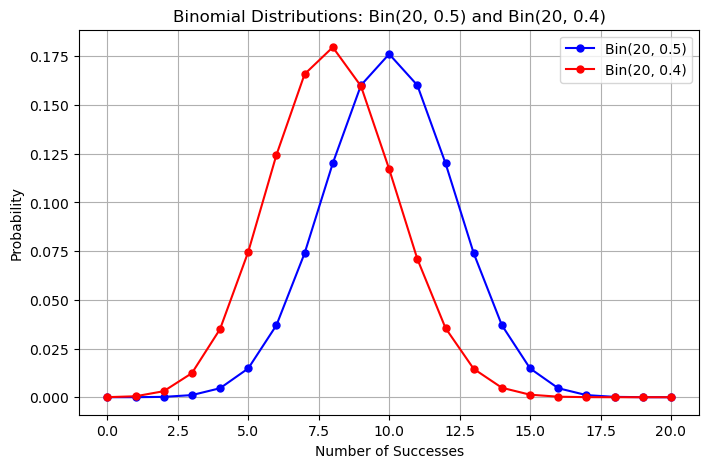

KL Divergence(Bin(20,0.5), Bin(20,0.4)) = 0.40821994520255167


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import entropy

# Parameters
n = 20
p = 0.5
q = 0.4
x = np.arange(0, n+1)

# Binomial distributions
binom_p = binom.pmf(x, n, p)
binom_q = binom.pmf(x, n, q)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, binom_p, 'bo-', label=f'Bin({n}, {p})', markersize=5)
plt.plot(x, binom_q, 'ro-', label=f'Bin({n}, {q})', markersize=5)
plt.title(f'Binomial Distributions: Bin({n}, {p}) and Bin({n}, {q})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

kl_div = entropy(binom_p, binom_q)
print(f"KL Divergence(Bin({n},{p}), Bin({n},{q})) = {kl_div}")

In [2]:
n*p*np.log(p/q) + (n-n*p)*np.log((1-p)/(1-q)) # same

0.40821994520255167

### Example: Normals

$$
\begin{eqnarray*}
P=N(\mu_1, \sigma_1^2) \\
Q=N(\mu_2, \sigma_2^2)
\end{eqnarray*}
$$

$$
KL(P,Q) = \log\left(\frac{\sigma_2}{\sigma_1}\right) + \frac{\sigma_1^2 + (\mu_1 - \mu_2)^2}{2\sigma_2^2} - \frac{1}{2}
$$



In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


def plot(mu1,mu2, s1, s2):
    dkl_normal = np.log(s2/s1) + 1/(2*s2**2) * ( (s1**2-s2**2) + (mu1-mu2)**2)

    # draw normals
    plt.clf()
    x_min = min(mu1,mu2) - max(s1,s2) * 3
    x_max = max(mu1,mu2) + max(s1,s2) * 3
    x = np.linspace(x_min, x_max, 1000)
    pdf1 = stats.norm.pdf(x, loc=mu1, scale=s1)
    pdf2 = stats.norm.pdf(x, loc=mu2, scale=s2)
    plt.plot(x, pdf1, label=f"N({mu1:.2f},{s1**2:.2f})")
    plt.plot(x, pdf2,  label=f"N({mu2:.2f},{s2**2:.2f})")
    plt.title(f"KL Divergence(N({mu1:.2f},{s1**2:.2f}), N({mu2:.2f},{s2**2:.2f}))= {dkl_normal:.2f}")
    plt.legend()
    plt.show()

    
    print(f"DKL(N(mu1,s1^2), N(mu2, s1^2)) = {dkl_normal}")
    return ;


mu1_slider = widgets.FloatSlider(value=0, min=-100, max=100, step=0.01, description="mu1")
mu2_slider = widgets.FloatSlider(value=10, min=-100, max=100, step=0.01, description="mu2")
s1_slider = widgets.FloatSlider(value=1, min=0.01, max=100, step=0.01, description="s1")
s2_slider = widgets.FloatSlider(value=4, min=0.01, max=100, step=0.01, description="s2")


interactive_plot = widgets.interactive(plot, mu1=mu1_slider, mu2=mu2_slider, s1=s1_slider, s2=s2_slider)
display(interactive_plot)



interactive(children=(FloatSlider(value=0.0, description='mu1', min=-100.0, step=0.01), FloatSlider(value=10.0…